<a href="https://colab.research.google.com/github/snoop2head/OIA_Text_Wrangling/blob/master/_Department_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
print(pd.__version__)
print(np.__version__)

1.1.0
1.18.5


In [2]:
file_name = "department_data.csv"
path = "data/" + file_name
df = pd.read_csv(path)
# 데이터의 크기가 어느정도인지 본다.
print(df.shape)
df.sample(5)

(469, 4)


,대학코드,NUM_VISITS,NUM_DEP,VAR
358,US000129,1,1,0.000000
345,US000109,22,14,1.530612
273,US000004,3,3,0.000000
295,US000034,23,16,1.496094
307,US000049,2,2,0.000000


In [3]:
df_data = df.loc[df["NUM_VISITS"]>=6]
df_data.sample(5)

,대학코드,NUM_VISITS,NUM_DEP,VAR
225,NL000010,108,21,114.884354
229,NL000014,11,5,5.760000
69,CN000022,18,7,5.673469
92,ES000001,24,5,57.760000
31,CA000006,42,22,2.900826


In [6]:
data = df_data.drop(columns=['대학코드', "NUM_DEP"])

In [7]:
# 정규화
transformer = MinMaxScaler(feature_range=(0, 1))
transformer.fit(data)
x_data = transformer.transform(data)

In [8]:
pd.DataFrame(x_data, columns=['NUM_VISITS', 'VAR']).corr()

,NUM_VISITS,VAR
NUM_VISITS,1.000000,0.555216
VAR,0.555216,1.000000


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

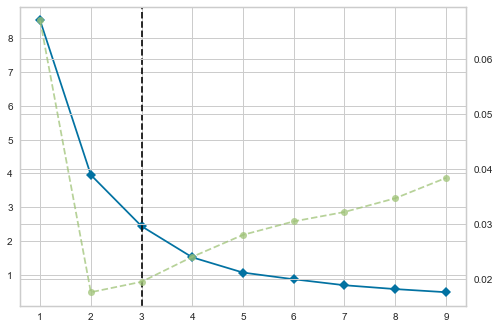

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(x_data)

In [11]:
# 4개 군집으로 진행
model = KMeans(n_clusters=3, random_state=307)
model.fit(x_data)

KMeans(n_clusters=3, random_state=307)

In [13]:
# 1번 그룹: 전공의 편향도가 낮은 그룹, 학생수가 많지는 않음
# 2번 그룹: 특정 전공의 편향도가 높은 그룹, 그리고 학생이 적음
# 3번 그룹: 전공의 편향도가 높고, 학생수가 매우 많음
cluster_mean = pd.DataFrame(model.cluster_centers_, columns=['NUM_VISITS', 'VAR'])
cluster_mean

,NUM_VISITS,VAR
0,0.059255,0.024757
1,0.718387,0.417782
2,0.104137,0.393517


In [14]:
df_data['category'] = model.labels_

In [15]:
df_data['category'].value_counts()

0    272
2     17
1      7
Name: category, dtype: int64

In [28]:
df_data[df_data['category'] == 2]

,대학코드,NUM_VISITS,NUM_DEP,VAR,category
38,CA000013,47,10,54.810000,2
45,CA000020,36,6,57.333333,2
74,DE000002,40,11,40.413223,2
75,DE000003,51,14,62.658163,2
92,ES000001,24,5,57.760000,2
112,FI000014,73,15,88.915556,2
114,FR000002,46,14,47.489796,2
169,IT000001,60,17,49.425606,2
216,NL000001,61,16,47.277344,2
221,NL000006,33,8,68.359375,2


In [33]:
list(df_data[df_data['category'] == 2]["대학코드"].values)
print()

['CA000013',
 'CA000020',
 'DE000002',
 'DE000003',
 'ES000001',
 'FI000014',
 'FR000002',
 'IT000001',
 'NL000001',
 'NL000006',
 'NL000010',
 'RU000002',
 'RU000003',
 'SE000001',
 'SG000003',
 'US000046',
 'US000123']

In [20]:
pca = PCA(n_components=2)
pca_fit = pca.fit(x_data)

In [21]:
pca_result = pd.DataFrame(data=pca.fit_transform(x_data))

In [22]:
pca_result['category'] = model.labels_

In [23]:
pca_result[:5]

,0,1,category
0,0.061489,0.060008,0
1,-0.092523,0.010911,0
2,0.080236,0.059039,0
3,-0.058751,0.026007,0
4,-0.084883,0.005070,0


In [24]:
pca_result = pca_result.rename(columns={0:'pca1', 1:'pca2'})

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

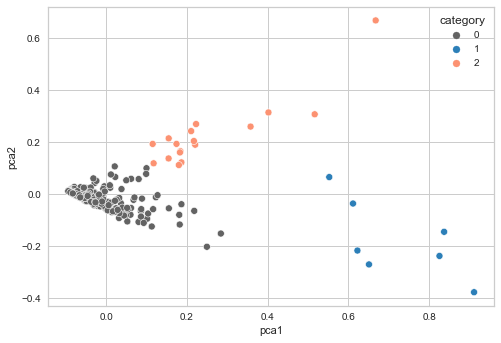

In [27]:
import seaborn as sns
sns.scatterplot(data=pca_result, x='pca1', y='pca2', hue='category', palette=['#636363','#2c7fb8', '#fc9272'])